# Treinamento YOLOv8 para Detecção de Carros e Placas

Este notebook treina um modelo YOLOv8 para detectar carros e placas em imagens. Pode ser executado no Google Colab ou ambiente local. O notebook cobre desde o download do dataset até a exportação do modelo treinado.

*Projeto: Controle Inteligente de Acesso Veicular*


## 1. Setup do Ambiente
Instale as dependências necessárias e configure o ambiente.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!pip install ultralytics

Mounted at /content/drive
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 39.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 110.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 90.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 62.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 73.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu1

In [ ]:
# This takes forever for some reason, you can also just download the model from the sidebar
from google.colab import files

files.download('/content/my_model.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## 2. Configuração do Dataset
Monte o Google Drive (se necessário) e garanta que os dados estão disponíveis.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!pip install ultralytics

Mounted at /content/drive
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 39.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 110.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 90.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 62.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 73.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu1

In [ ]:
from ultralytics import YOLO
import yaml
import os

DATASET_PATH = '/content/drive/MyDrive/Dataset/data-expanded'
CLASSES_PATH = '/content/drive/MyDrive/Dataset/data-expanded/classes.txt'
YAML_PATH = '/content/drive/MyDrive/Dataset/data-expanded/data.yaml'

# Read class.txt to get class names
with open(CLASSES_PATH, 'r') as f:
  classes = []
  for line in f.readlines():
    if len(line.strip()) == 0: continue
    classes.append(line.strip())
number_of_classes = len(classes)

data = {
    'path': f'{DATASET_PATH}',
    'train': 'train/images',
    'val': 'validation/images',
    'nc': number_of_classes,
    'names': classes
}

# Write data to YAML file
with open(YAML_PATH, 'w') as f:
  yaml.dump(data, f, sort_keys=False)
print(f'Created config file at {YAML_PATH}')


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Created config file at /content/drive/MyDrive/Dataset/data-expanded/data.yaml


In [ ]:
!yolo detect train data=/content/drive/MyDrive/Dataset/data-expanded/data.yaml model=yolo12x.pt epochs=60 imgsz=640 batch=4

Ultralytics 8.3.143 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=4, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/Dataset/data-expanded/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=60, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo12x.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train3, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=T

In [ ]:
!yolo detect predict model=runs/detect/train3/weights/best.pt source=/content/drive/MyDrive/Dataset/data-expanded/validation/images save=True

Ultralytics 8.3.143 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv12x summary (fused): 283 layers, 59,045,654 parameters, 0 gradients, 198.5 GFLOPs

image 1/9 /content/drive/MyDrive/Dataset/data-expanded/validation/images/0b77c062-photo_2025-05-21_22.21.18.jpeg: 640x480 2 Cars, 1 Plate, 125.4ms
image 2/9 /content/drive/MyDrive/Dataset/data-expanded/validation/images/12d4aa42-photo_2025-05-21_22.21.27.jpeg: 640x640 3 Cars, 1 Plate, 92.2ms
image 3/9 /content/drive/MyDrive/Dataset/data-expanded/validation/images/3a7fb6de-photo_2025-05-21_22.21.23.jpeg: 288x640 4 Cars, 1 Plate, 102.1ms
image 4/9 /content/drive/MyDrive/Dataset/data-expanded/validation/images/5cd2bfa7-photo_2025-05-21_22.21.28.jpeg: 352x640 3 Cars, 1 Plate, 110.6ms
image 5/9 /content/drive/MyDrive/Dataset/data-expanded/validation/images/769469b6-photo_2025-05-21_22.21.17.jpeg: 480x640 2 Cars, 1 Plate, 131.0ms
image 6/9 /content/drive/MyDrive/Dataset/data-expanded/validation/images/76dbd80a-photo_2025-05

## 3. Organização dos Dados
Prepare as pastas e visualize algumas amostras (opcional).

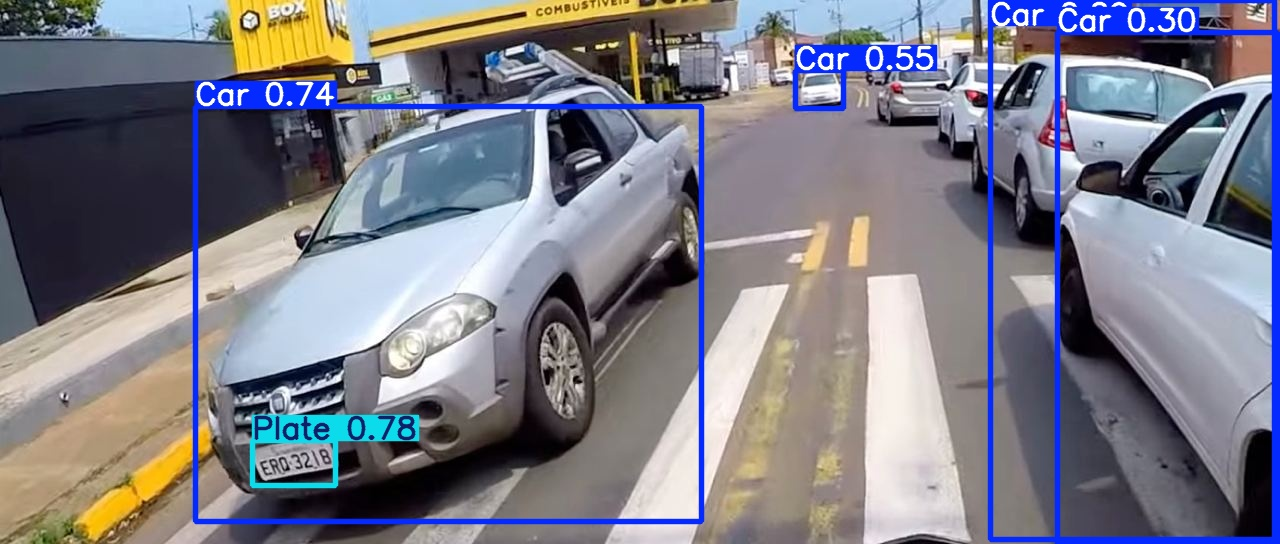

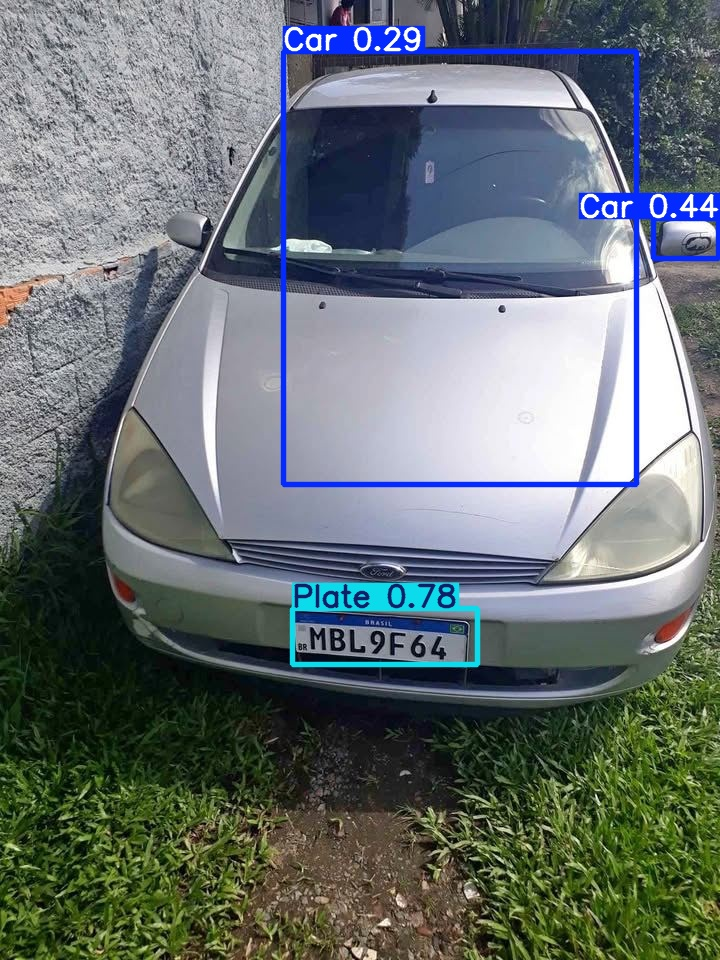

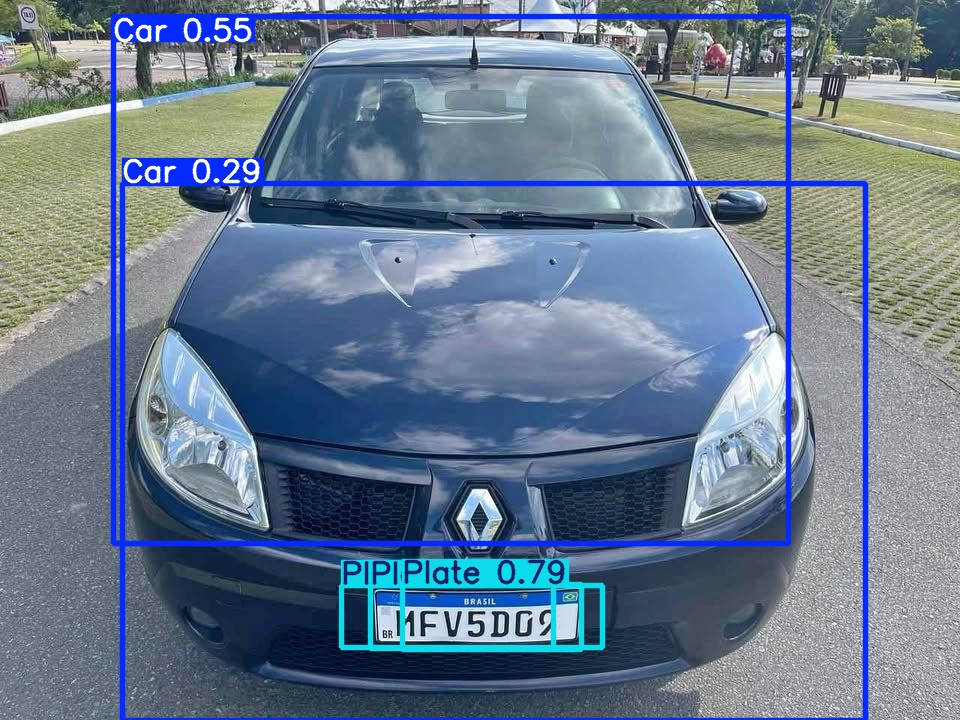

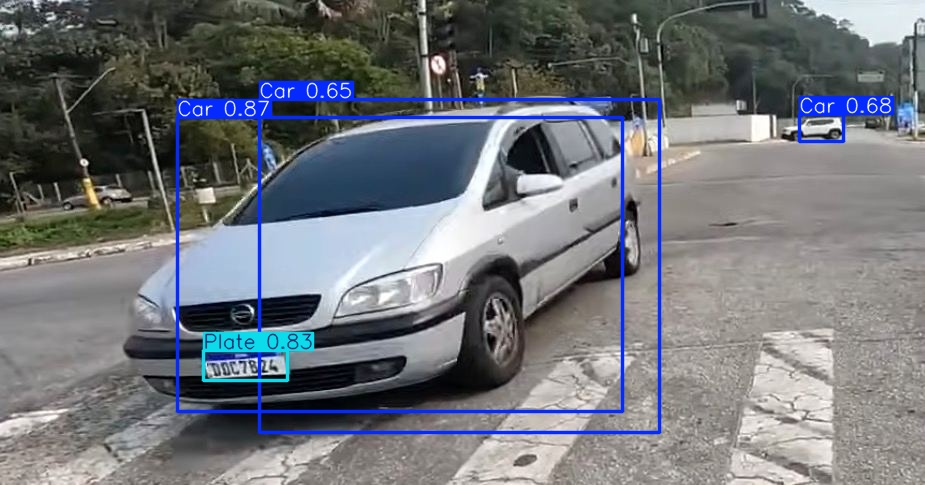

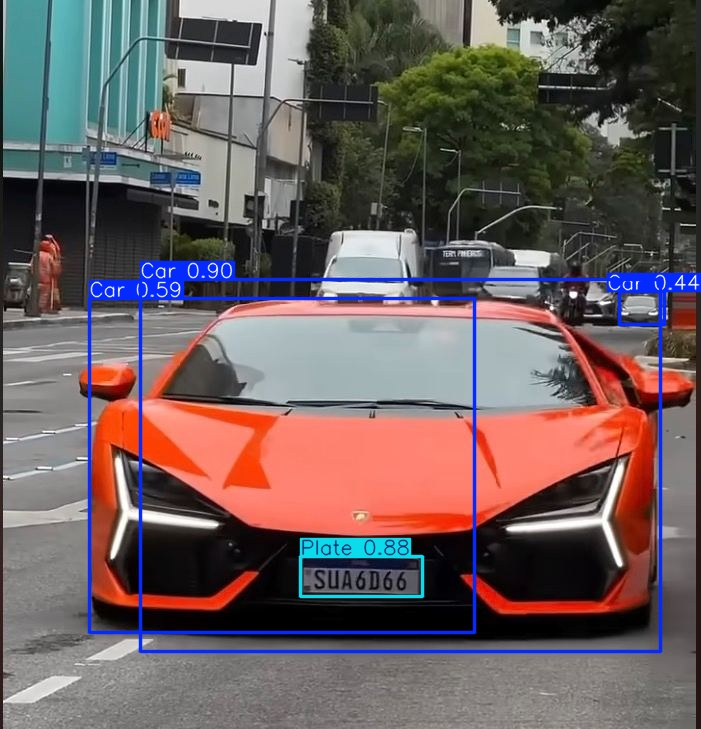

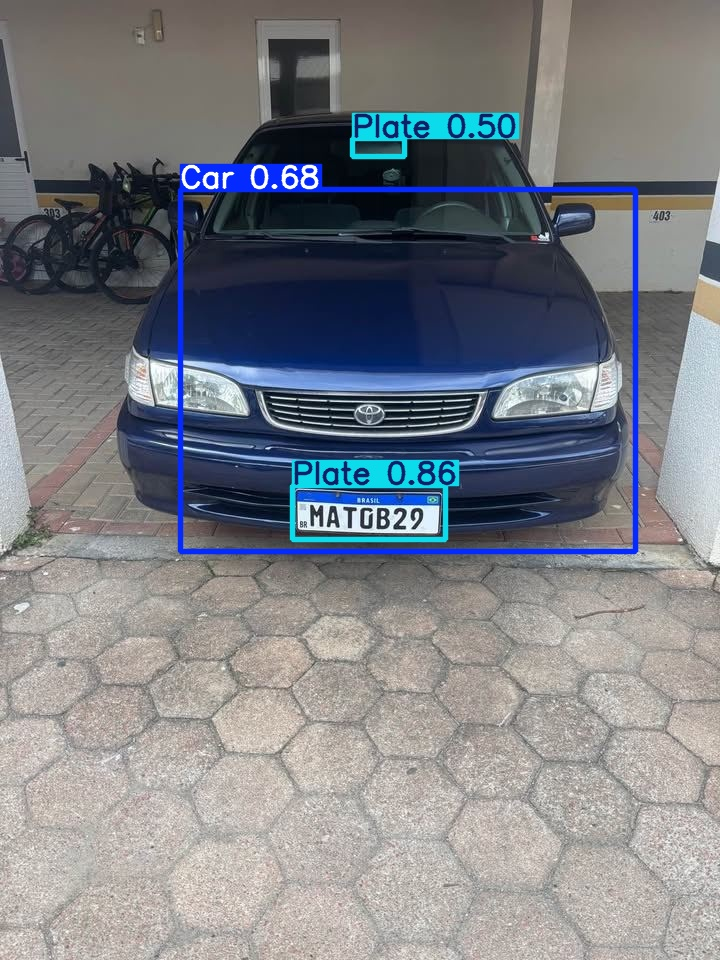

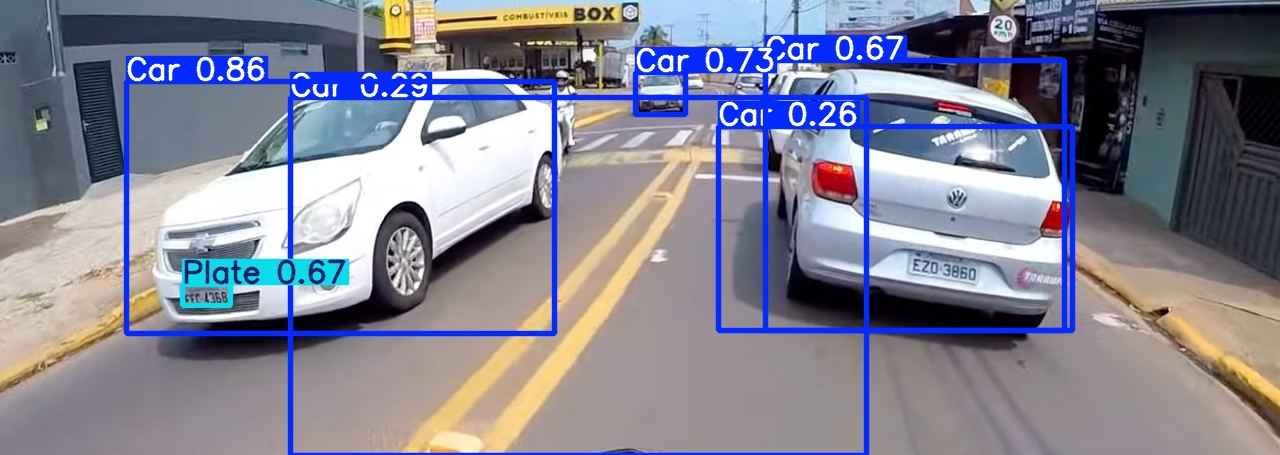

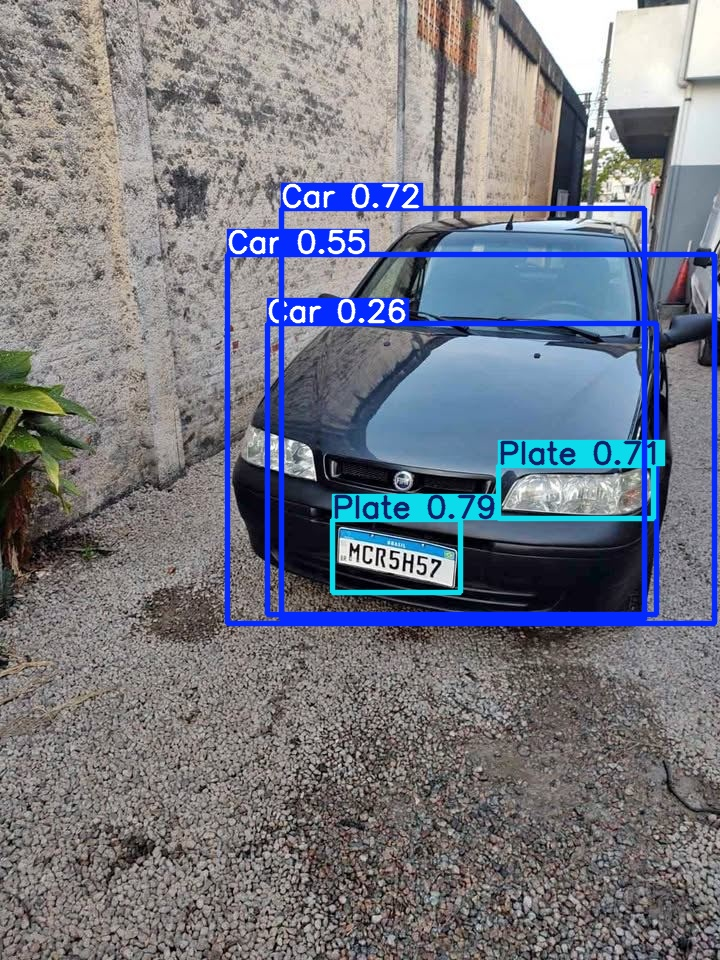

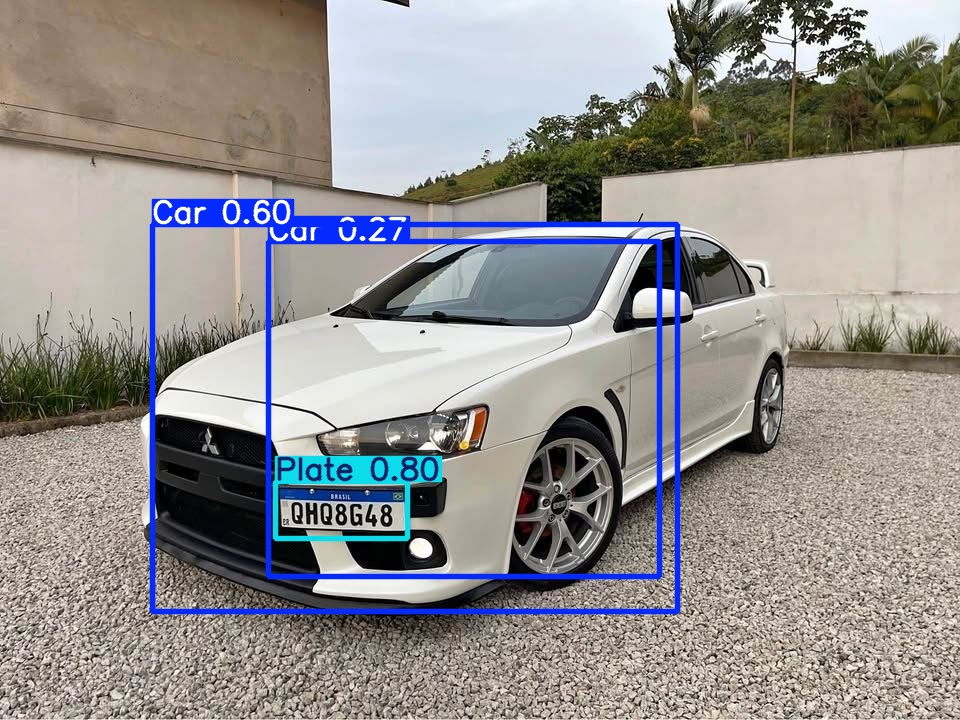

In [ ]:
import glob
from IPython.display import Image, display
for image_path in glob.glob(f'/content/runs/detect/predict2/*.jpg')[:10]:
  display(Image(filename=image_path, height=400))
  print('\n')


## 4. Instalação do Ultralytics e YOLO
Se necessário, reinstale/atualize o Ultralytics para garantir que o YOLOv8 esteja disponível.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!pip install ultralytics

Mounted at /content/drive
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 39.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 110.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 90.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 62.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 73.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu1

In [ ]:
from ultralytics import YOLO
import yaml
import os

DATASET_PATH = '/content/drive/MyDrive/Dataset/data-expanded'
CLASSES_PATH = '/content/drive/MyDrive/Dataset/data-expanded/classes.txt'
YAML_PATH = '/content/drive/MyDrive/Dataset/data-expanded/data.yaml'

# Read class.txt to get class names
with open(CLASSES_PATH, 'r') as f:
  classes = []
  for line in f.readlines():
    if len(line.strip()) == 0: continue
    classes.append(line.strip())
number_of_classes = len(classes)

data = {
    'path': f'{DATASET_PATH}',
    'train': 'train/images',
    'val': 'validation/images',
    'nc': number_of_classes,
    'names': classes
}

# Write data to YAML file
with open(YAML_PATH, 'w') as f:
  yaml.dump(data, f, sort_keys=False)
print(f'Created config file at {YAML_PATH}')


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Created config file at /content/drive/MyDrive/Dataset/data-expanded/data.yaml


In [ ]:
!yolo detect train data=/content/drive/MyDrive/Dataset/data-expanded/data.yaml model=yolo12x.pt epochs=60 imgsz=640 batch=4

Ultralytics 8.3.143 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=4, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/Dataset/data-expanded/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=60, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo12x.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train3, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=T

In [ ]:
!yolo detect predict model=runs/detect/train3/weights/best.pt source=/content/drive/MyDrive/Dataset/data-expanded/validation/images save=True

Ultralytics 8.3.143 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv12x summary (fused): 283 layers, 59,045,654 parameters, 0 gradients, 198.5 GFLOPs

image 1/9 /content/drive/MyDrive/Dataset/data-expanded/validation/images/0b77c062-photo_2025-05-21_22.21.18.jpeg: 640x480 2 Cars, 1 Plate, 125.4ms
image 2/9 /content/drive/MyDrive/Dataset/data-expanded/validation/images/12d4aa42-photo_2025-05-21_22.21.27.jpeg: 640x640 3 Cars, 1 Plate, 92.2ms
image 3/9 /content/drive/MyDrive/Dataset/data-expanded/validation/images/3a7fb6de-photo_2025-05-21_22.21.23.jpeg: 288x640 4 Cars, 1 Plate, 102.1ms
image 4/9 /content/drive/MyDrive/Dataset/data-expanded/validation/images/5cd2bfa7-photo_2025-05-21_22.21.28.jpeg: 352x640 3 Cars, 1 Plate, 110.6ms
image 5/9 /content/drive/MyDrive/Dataset/data-expanded/validation/images/769469b6-photo_2025-05-21_22.21.17.jpeg: 480x640 2 Cars, 1 Plate, 131.0ms
image 6/9 /content/drive/MyDrive/Dataset/data-expanded/validation/images/76dbd80a-photo_2025-05

## 5. Treinamento do Modelo
Configure os parâmetros de treinamento, defina o path do dataset e inicie o treinamento do modelo YOLOv8.

In [ ]:
from ultralytics import YOLO
import yaml
import os

DATASET_PATH = '/content/drive/MyDrive/Dataset/data-expanded'
CLASSES_PATH = '/content/drive/MyDrive/Dataset/data-expanded/classes.txt'
YAML_PATH = '/content/drive/MyDrive/Dataset/data-expanded/data.yaml'

# Read class.txt to get class names
with open(CLASSES_PATH, 'r') as f:
  classes = []
  for line in f.readlines():
    if len(line.strip()) == 0: continue
    classes.append(line.strip())
number_of_classes = len(classes)

data = {
    'path': f'{DATASET_PATH}',
    'train': 'train/images',
    'val': 'validation/images',
    'nc': number_of_classes,
    'names': classes
}

# Write data to YAML file
with open(YAML_PATH, 'w') as f:
  yaml.dump(data, f, sort_keys=False)
print(f'Created config file at {YAML_PATH}')


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Created config file at /content/drive/MyDrive/Dataset/data-expanded/data.yaml


In [ ]:
!yolo detect train data=/content/drive/MyDrive/Dataset/data-expanded/data.yaml model=yolo12x.pt epochs=60 imgsz=640 batch=4

Ultralytics 8.3.143 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=4, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/Dataset/data-expanded/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=60, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo12x.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train3, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=T

In [ ]:
!yolo detect predict model=runs/detect/train3/weights/best.pt source=/content/drive/MyDrive/Dataset/data-expanded/validation/images save=True

Ultralytics 8.3.143 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv12x summary (fused): 283 layers, 59,045,654 parameters, 0 gradients, 198.5 GFLOPs

image 1/9 /content/drive/MyDrive/Dataset/data-expanded/validation/images/0b77c062-photo_2025-05-21_22.21.18.jpeg: 640x480 2 Cars, 1 Plate, 125.4ms
image 2/9 /content/drive/MyDrive/Dataset/data-expanded/validation/images/12d4aa42-photo_2025-05-21_22.21.27.jpeg: 640x640 3 Cars, 1 Plate, 92.2ms
image 3/9 /content/drive/MyDrive/Dataset/data-expanded/validation/images/3a7fb6de-photo_2025-05-21_22.21.23.jpeg: 288x640 4 Cars, 1 Plate, 102.1ms
image 4/9 /content/drive/MyDrive/Dataset/data-expanded/validation/images/5cd2bfa7-photo_2025-05-21_22.21.28.jpeg: 352x640 3 Cars, 1 Plate, 110.6ms
image 5/9 /content/drive/MyDrive/Dataset/data-expanded/validation/images/769469b6-photo_2025-05-21_22.21.17.jpeg: 480x640 2 Cars, 1 Plate, 131.0ms
image 6/9 /content/drive/MyDrive/Dataset/data-expanded/validation/images/76dbd80a-photo_2025-05

In [ ]:
!mkdir /content/my_model
!cp /content/runs/detect/train3/weights/best.pt /content/my_model/my_model.pt
!cp -r /content/runs/detect/train3 /content/my_model

# Zip into "my_model.zip"
%cd my_model
!zip /content/my_model.zip my_model.pt
!zip -r /content/my_model.zip train3
%cd /content

mkdir: cannot create directory ‘/content/my_model’: File exists
/content/my_model
updating: my_model.pt (deflated 9%)
  adding: train3/ (stored 0%)
  adding: train3/confusion_matrix.png (deflated 38%)
  adding: train3/args.yaml (deflated 52%)
  adding: train3/results.png (deflated 7%)
  adding: train3/F1_curve.png (deflated 11%)
  adding: train3/train_batch1451.jpg (deflated 18%)
  adding: train3/val_batch0_pred.jpg (deflated 10%)
  adding: train3/confusion_matrix_normalized.png (deflated 31%)
  adding: train3/train_batch2.jpg (deflated 5%)
  adding: train3/val_batch1_labels.jpg (deflated 6%)
  adding: train3/weights/ (stored 0%)
  adding: train3/weights/best.pt (deflated 9%)
  adding: train3/weights/last.pt (deflated 9%)
  adding: train3/train_batch0.jpg (deflated 8%)
  adding: train3/labels_correlogram.jpg (deflated 44%)
  adding: train3/R_curve.png (deflated 14%)
  adding: train3/train_batch1452.jpg (deflated 6%)
  adding: train3/val_batch1_pred.jpg (deflated 6%)
  adding: train3/tr

## 6. Avaliação e Exportação do Modelo
Avalie o desempenho do modelo e salve/exporte os pesos finais para uso no backend ou aplicação real.

In [ ]:
!yolo detect predict model=runs/detect/train3/weights/best.pt source=/content/drive/MyDrive/Dataset/data-expanded/validation/images save=True

Ultralytics 8.3.143 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv12x summary (fused): 283 layers, 59,045,654 parameters, 0 gradients, 198.5 GFLOPs

image 1/9 /content/drive/MyDrive/Dataset/data-expanded/validation/images/0b77c062-photo_2025-05-21_22.21.18.jpeg: 640x480 2 Cars, 1 Plate, 125.4ms
image 2/9 /content/drive/MyDrive/Dataset/data-expanded/validation/images/12d4aa42-photo_2025-05-21_22.21.27.jpeg: 640x640 3 Cars, 1 Plate, 92.2ms
image 3/9 /content/drive/MyDrive/Dataset/data-expanded/validation/images/3a7fb6de-photo_2025-05-21_22.21.23.jpeg: 288x640 4 Cars, 1 Plate, 102.1ms
image 4/9 /content/drive/MyDrive/Dataset/data-expanded/validation/images/5cd2bfa7-photo_2025-05-21_22.21.28.jpeg: 352x640 3 Cars, 1 Plate, 110.6ms
image 5/9 /content/drive/MyDrive/Dataset/data-expanded/validation/images/769469b6-photo_2025-05-21_22.21.17.jpeg: 480x640 2 Cars, 1 Plate, 131.0ms
image 6/9 /content/drive/MyDrive/Dataset/data-expanded/validation/images/76dbd80a-photo_2025-05

## 7. Inferência de Exemplo
Faça uma inferência rápida para testar o modelo treinado em uma imagem do seu conjunto de validação/teste.

In [ ]:
!yolo detect predict model=runs/detect/train3/weights/best.pt source=/content/drive/MyDrive/Dataset/data-expanded/validation/images save=True

Ultralytics 8.3.143 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv12x summary (fused): 283 layers, 59,045,654 parameters, 0 gradients, 198.5 GFLOPs

image 1/9 /content/drive/MyDrive/Dataset/data-expanded/validation/images/0b77c062-photo_2025-05-21_22.21.18.jpeg: 640x480 2 Cars, 1 Plate, 125.4ms
image 2/9 /content/drive/MyDrive/Dataset/data-expanded/validation/images/12d4aa42-photo_2025-05-21_22.21.27.jpeg: 640x640 3 Cars, 1 Plate, 92.2ms
image 3/9 /content/drive/MyDrive/Dataset/data-expanded/validation/images/3a7fb6de-photo_2025-05-21_22.21.23.jpeg: 288x640 4 Cars, 1 Plate, 102.1ms
image 4/9 /content/drive/MyDrive/Dataset/data-expanded/validation/images/5cd2bfa7-photo_2025-05-21_22.21.28.jpeg: 352x640 3 Cars, 1 Plate, 110.6ms
image 5/9 /content/drive/MyDrive/Dataset/data-expanded/validation/images/769469b6-photo_2025-05-21_22.21.17.jpeg: 480x640 2 Cars, 1 Plate, 131.0ms
image 6/9 /content/drive/MyDrive/Dataset/data-expanded/validation/images/76dbd80a-photo_2025-05

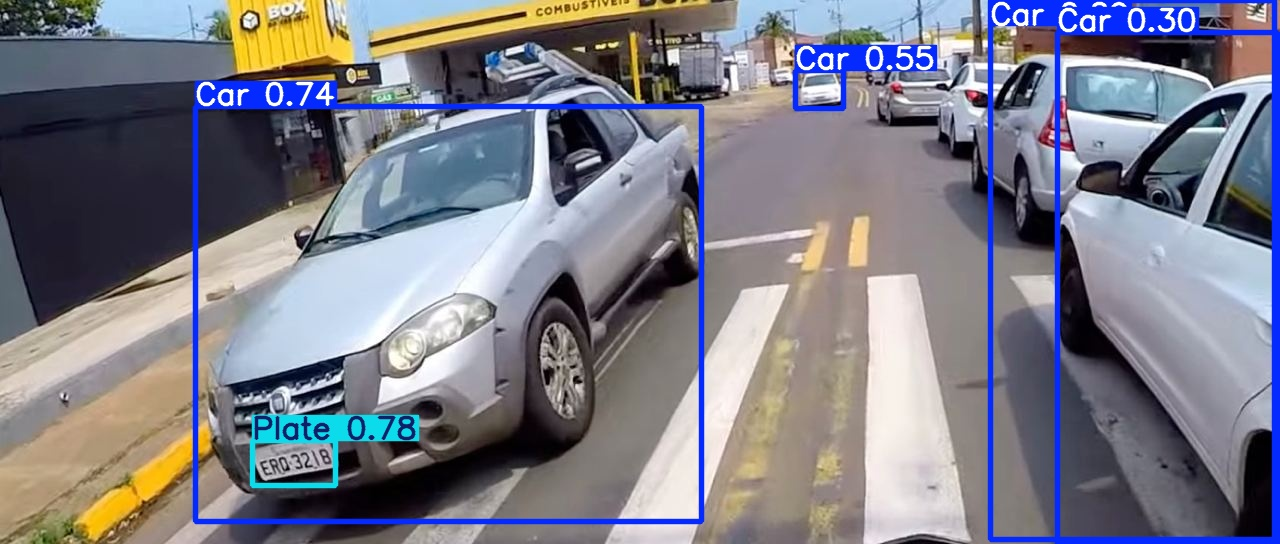

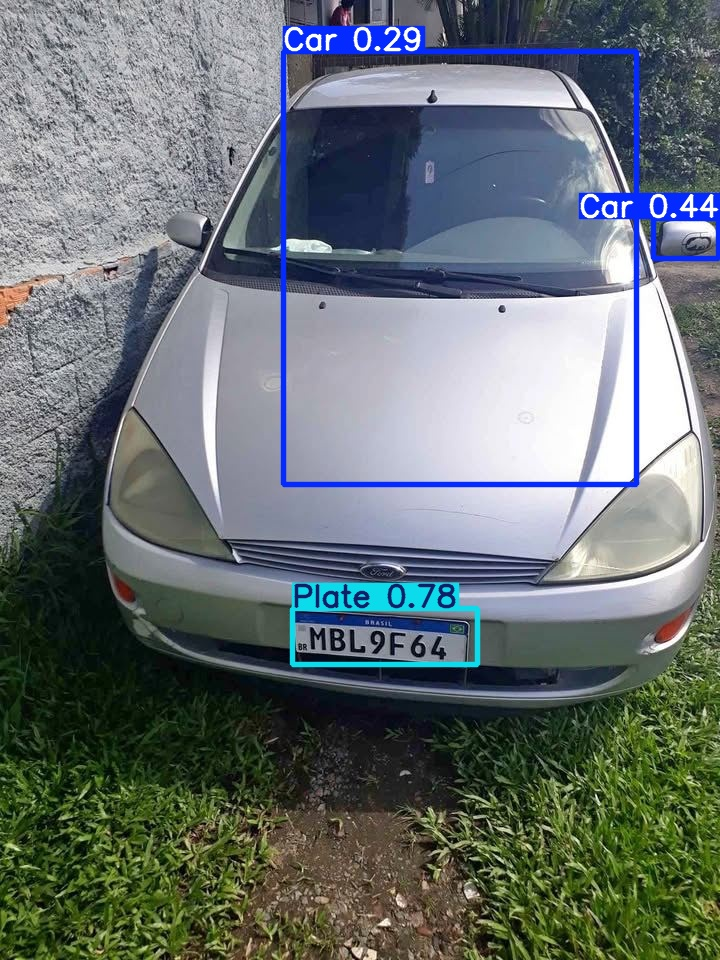

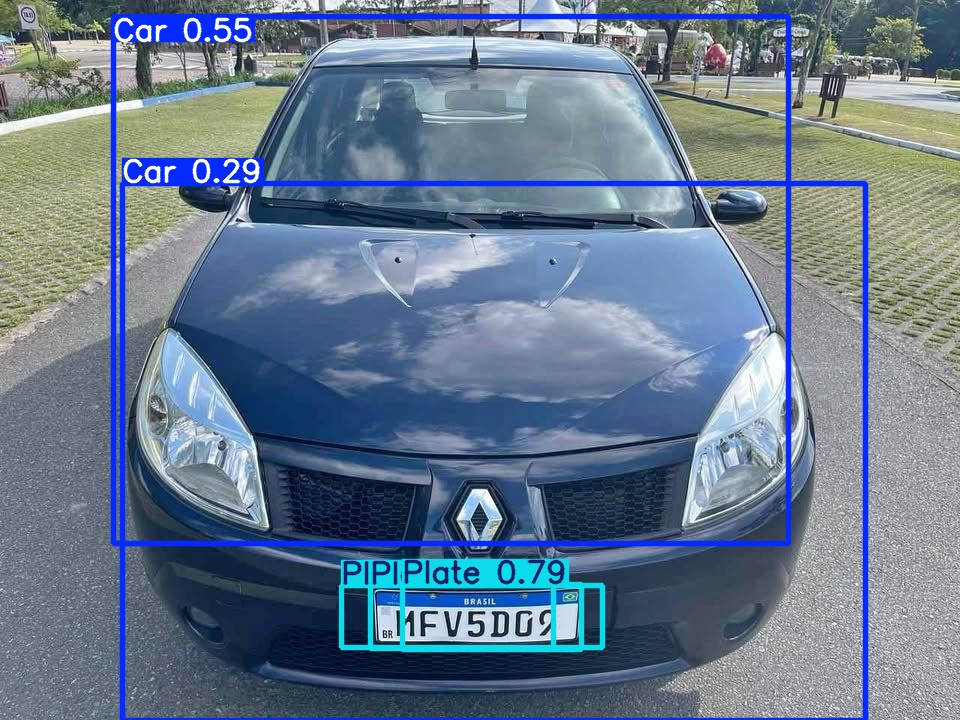

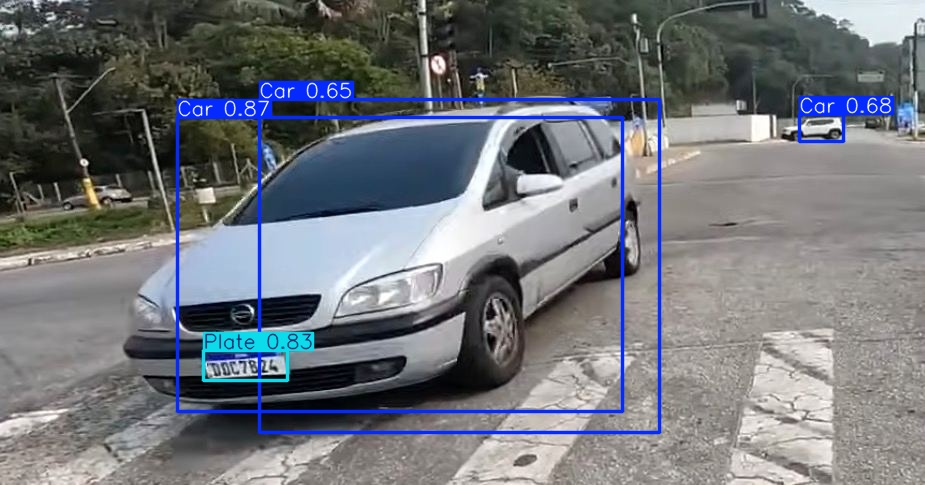

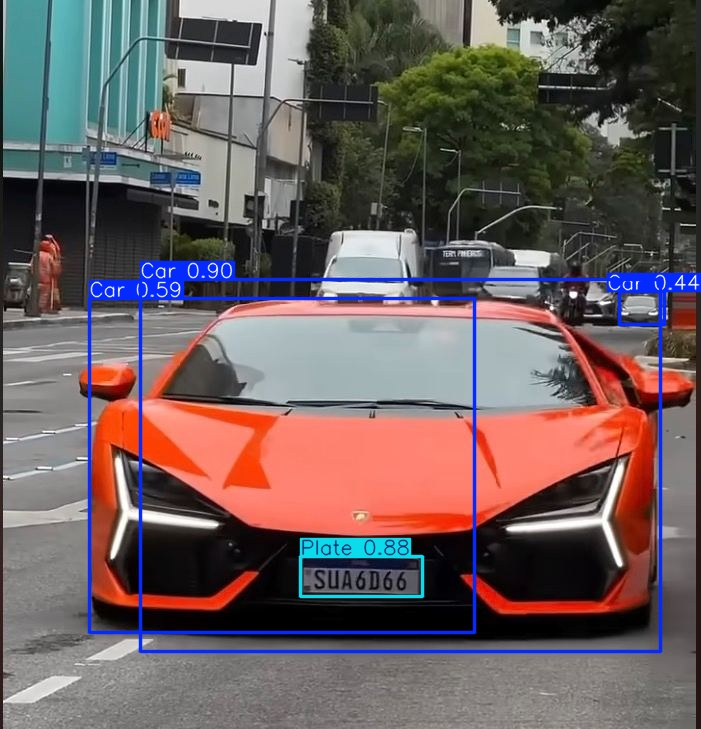

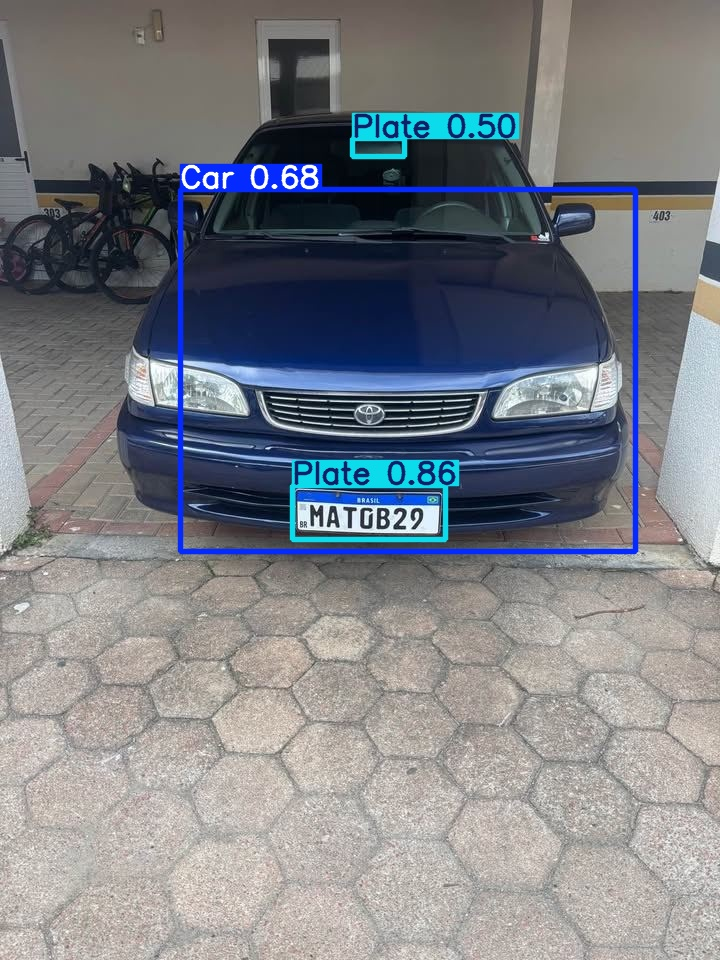

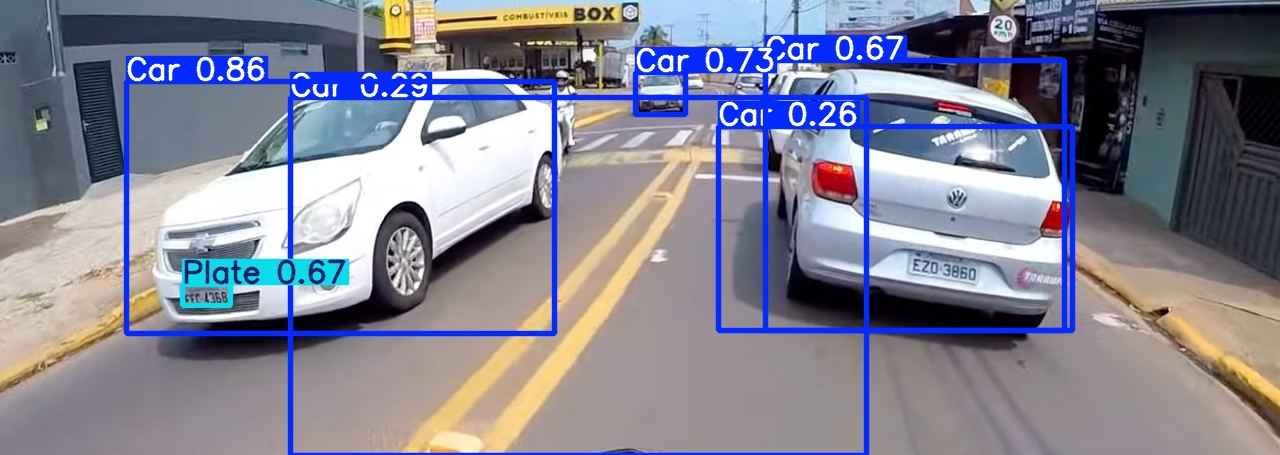

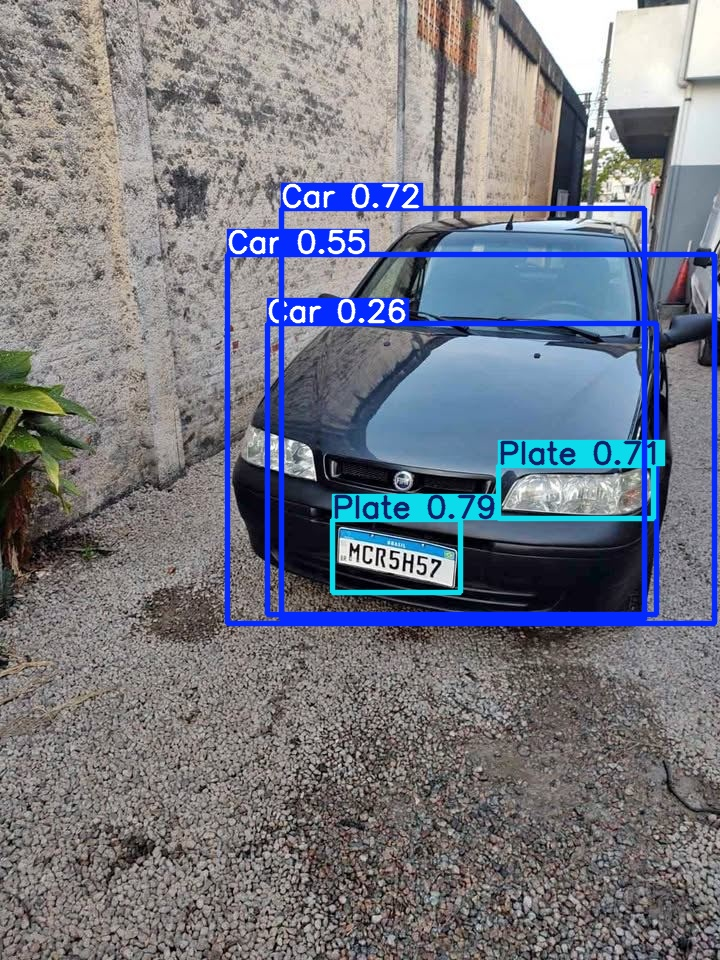

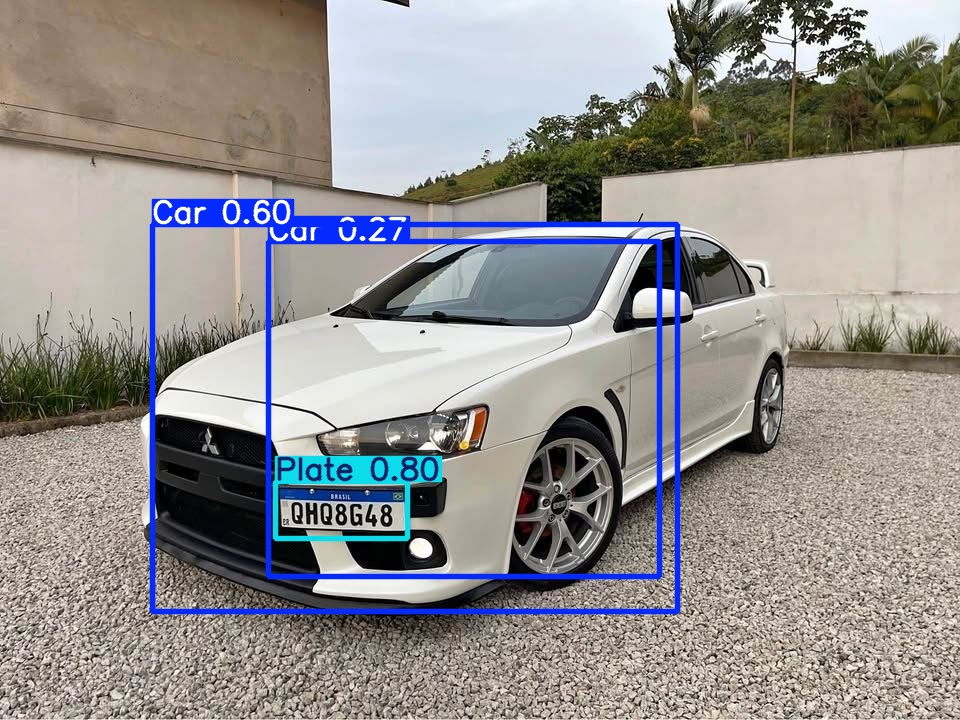

In [ ]:
import glob
from IPython.display import Image, display
for image_path in glob.glob(f'/content/runs/detect/predict2/*.jpg')[:10]:
  display(Image(filename=image_path, height=400))
  print('\n')


---

Notebook formatado para repositórios e apresentações de TCC. Personalize este notebook conforme seu fluxo real de dados, nomes de arquivos e estrutura de pastas. Se necessário, adicione mais células de visualização ou comentários para explicar decisões importantes.

Desenvolvido por [Seu Nome].
